Hello! Welcome!

Imports below.  We're going to do some analysis.

(Will make this more thorough later)

In [22]:
import numpy as np; np.random.seed(1337)
import pandas as pd
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt; plt.style.use('fivethirtyeight')
# %matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans

In [23]:
country_data = pd.read_csv('country-data.csv')
country_names = country_data.pop('country')
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [24]:
country_data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [25]:
country_data.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


We can see some interesting correlations below.  Health factors correlate with mortality rates.

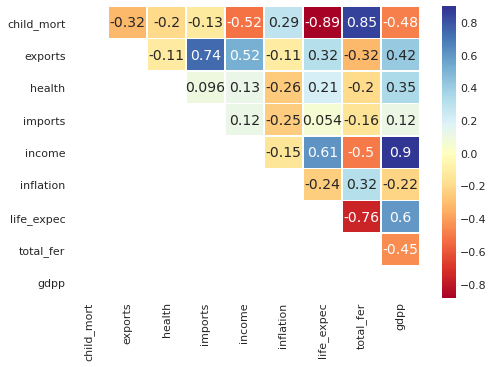

In [26]:
cor = country_data.corr()
mask = np.zeros_like(cor)
mask[np.tril_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    sns.heatmap(cor, 
                cmap = 'RdYlBu',
                mask=mask, 
                center=0, annot=True, linewidths=.5)

This doesn't look good.  Two of the variables are scaled completely differently.

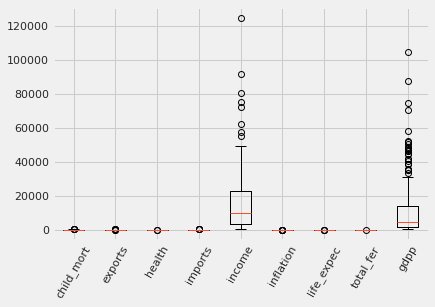

In [27]:
plt.boxplot(country_data, labels=country_data.columns)
plt.xticks(rotation=60);

Much better.

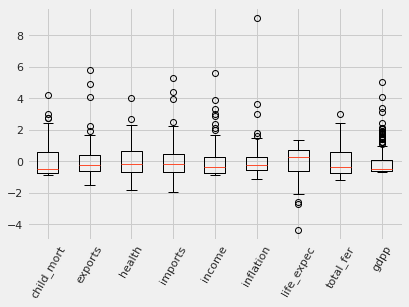

In [28]:
plt.boxplot(scale(country_data), labels=country_data.columns);
plt.xticks(rotation=60);

The first 3 components explain almost 80% of the variance.

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


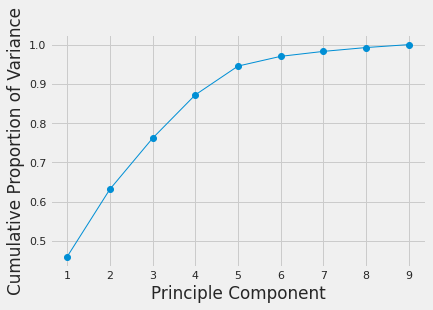

In [29]:
country_data_scaled = scale(country_data)
country_pca = PCA()
pca = country_pca.fit_transform(country_data_scaled)
plt.plot(np.arange(1,10), np.cumsum(country_pca.explained_variance_ratio_), 'o-', linewidth='1');
plt.xlabel('Principle Component');
plt.ylabel('Cumulative Proportion of Variance');
print(country_pca.explained_variance_ratio_)

An initial attempt at clustering.  We can see 3 distinct datapoints that are clustered by themselves using 4 clusters.

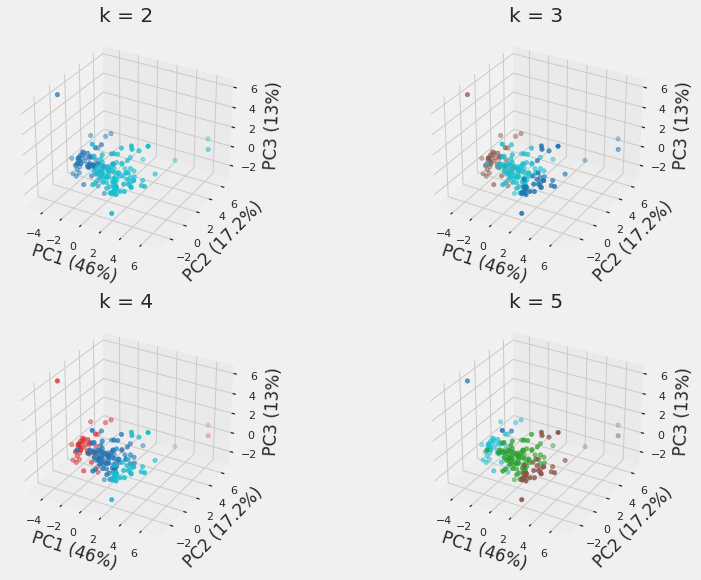

In [46]:
def pipeline(data, loc, fig, k=2):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    ax = fig.add_subplot(loc, projection='3d')
    ax.set_title('k = {}'.format(k))
    ax.scatter(pca[:,0], pca[:,1], pca[:,2],
        c=kmeans.labels_,
        cmap='tab10');
    ax.set_xlabel('PC1 (46%)');
    ax.set_ylabel('PC2 (17.2%)');
    ax.set_zlabel('PC3 (13%)');


fig = plt.figure(figsize=(12,9))
pipeline(country_data_scaled, 221, fig, k=2)
pipeline(country_data_scaled, 222, fig, k=3)
pipeline(country_data_scaled, 223, fig, k=4)
pipeline(country_data_scaled, 224, fig, k=5)